# Verilerin Sayısallaştırılması

Bilgisayarlar resimleri, sesleri veya kelimeleri bizim gibi algılamaz. Onlar için her şey sayılardan ibaret olmalıdır. Tensörler, gerçek dünyadaki bu verileri (resimdeki pizza, adam vb.) bilgisayarın işleyebileceği sayısal matrislere dönüştüren kapsayıcılardır.

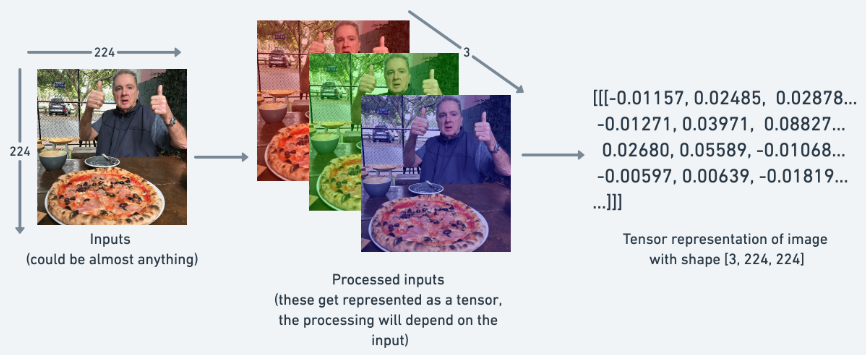

- Girdi (Input): Sol tarafta standart bir fotoğraf var (224 piksel boyunda, 224 piksel eninde).

- İşlem (Process): Fotoğraf katmanlarına ayrılıyor. Dijital dünyada renkli resimler genellikle 3 temel renkten oluşur: Kırmızı (Red), Yeşil (Green), Mavi (Blue).

- Tensör Temsili (Tensor Representation): Sağ tarafta gördüğün karmaşık sayılar kümesi, o resmin bilgisayar belleğindeki halidir. Her bir pikselin renk yoğunluğu, 0.02485 veya -0.01157 gibi ondalıklı sayılarla (floating point) ifade edilmiştir.

Görselde tensörün boyutu (shape) şöyle ifade edilmiş:$$[3, 224, 224]$$Bu sıralama PyTorch'un standart formatıdır (Buna CHW formatı denir):

1- 3 (Colour Channels): Renk kanalı sayısı (RGB olduğu için 3). Eğer siyah-beyaz (grayscale) bir resim olsaydı burası 1 olacaktı.

2- (Height): Resmin yüksekliği (piksel).

3- 224 (Width): Resmin genişliği (piksel).

In [1]:
import torch
torch.__version__

'2.9.0+cu126'

# Scaler

Skaler, sadece büyüklüğü olan (yönü olmayan) tek bir sayıdır (Örn: 7, 3.14, -5). PyTorch dünyasında skaler, "0 Boyutlu Tensör" olarak adlandırılır. En alt seviyedeki yapı taşıdır. İçinde sadece tek bir veri barındırır.

In [2]:
scalar = torch.tensor(7)
scalar

tensor(7)

- Bu komut, Python'daki standart integer (tamsayı) olan 7'yi alır ve onu PyTorch'un işlem yapabileceği, GPU'ya taşınabilen ve türevi alınabilen özel bir nesneye (object) dönüştürür.

- tensor(7) ifadesi, uzayda hiçbir yönü olmayan, sadece bir büyüklüğü (değeri) ifade eden tek bir noktadır.

## Boyut Kontrolü: .ndim (Number of Dimensions)

In [3]:
scalar.ndim

0

- Bu bir attribute'dur (nitelik). Tensörün kaç boyuta sahip olduğunu söyler.

- Neden 0? Hatırlarsan skalerler sadece bir sayıdan ibaretti (büyüklüğü var, yönü yok). Bu yüzden 0 boyutludurlar.

- Eğer bir vektör olsaydı 1, matris olsaydı 2 sonucunu alacaktın.

## Veriyi Geri Alma: .item() Metodu

In [4]:
scalar.item()

7

- Tensörün içindeki sayıyı çekip, onu saf bir Python Integer (veya Float) haline getirir.

- Fark Nedir? Scalar değişkeni bir torch.Tensor nesnesidir. GPU'da yaşayabilir, türevi alınabilir.

- scalar.item() ise standart bir Python sayısıdır (7).

## Vector

In [5]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

Vektör, tek bir boyuta sahip olan ancak içinde birden fazla sayı barındırabilen bir yapıdır. [7,7] vektörü: Bir evdeki [Yatak Odası Sayısı, Banyo Sayısı]nı temsil edebilir.
Bu, verinin artık bir bağlamı (context) ve ilişkisi olduğunu gösterir.

In [6]:
vector.ndim

1

Vector değişkeninin içinde 2 adet sayı (7, 7) olmasına rağmen, boyutunun (ndim) neden 1 çıktı?

- PyTorch'ta bir tensörün boyutunu anlamak için en dıştaki köşeli parantezleri sayman yeterlidir.
    - [7, 7] -> 1 tane açılış parantezi var ([) -> 1 Boyutlu (Vektör).

    - [[7, 7]] -> 2 tane açılış parantezi olsaydı -> 2 Boyutlu (Matris) olacaktı.

In [7]:
vector.shape

torch.Size([2])

Anlamı: "Shape" bize boyutun kendisini değil, o boyutun içeriğini (uzunluğunu) söyler.

Bu çıktı şunu diyor: "Senin elinde 1 boyutlu bir yapı var ve bu yapının içinde 2 tane eleman var.".

## Matrix

In [8]:
MATRIX = torch.tensor([[7,8],
                       [9,10]])

2 x 2 matris olduğu için 2 tane '[' işareti ile başladı.

In [9]:
MATRIX.ndim

2

- Kodun en başına bak: [[ şeklinde 2 adet açılış parantezi var.

- Bu yüzden MATRIX.ndim (boyut sayısı) 2 çıkıyor.

In [10]:
MATRIX.shape

torch.Size([2, 2])

- Anlamı: Bu matris 2 satır (derinlik) ve 2 sütundan (genişlik) oluşuyor
- Mühendislikte buna $2 \times 2$ matris deriz. Genelde görüntü işlerken (image processing) siyah-beyaz resimler bu formatta (Yükseklik x Genişlik) tutulur.

In [11]:
TENSOR = torch.tensor([[[1,2,3],
                        [3,6,9],
                        [2,4,5]]])

In [12]:
TENSOR.ndim

3

In [13]:
TENSOR.shape

torch.Size([1, 3, 3])

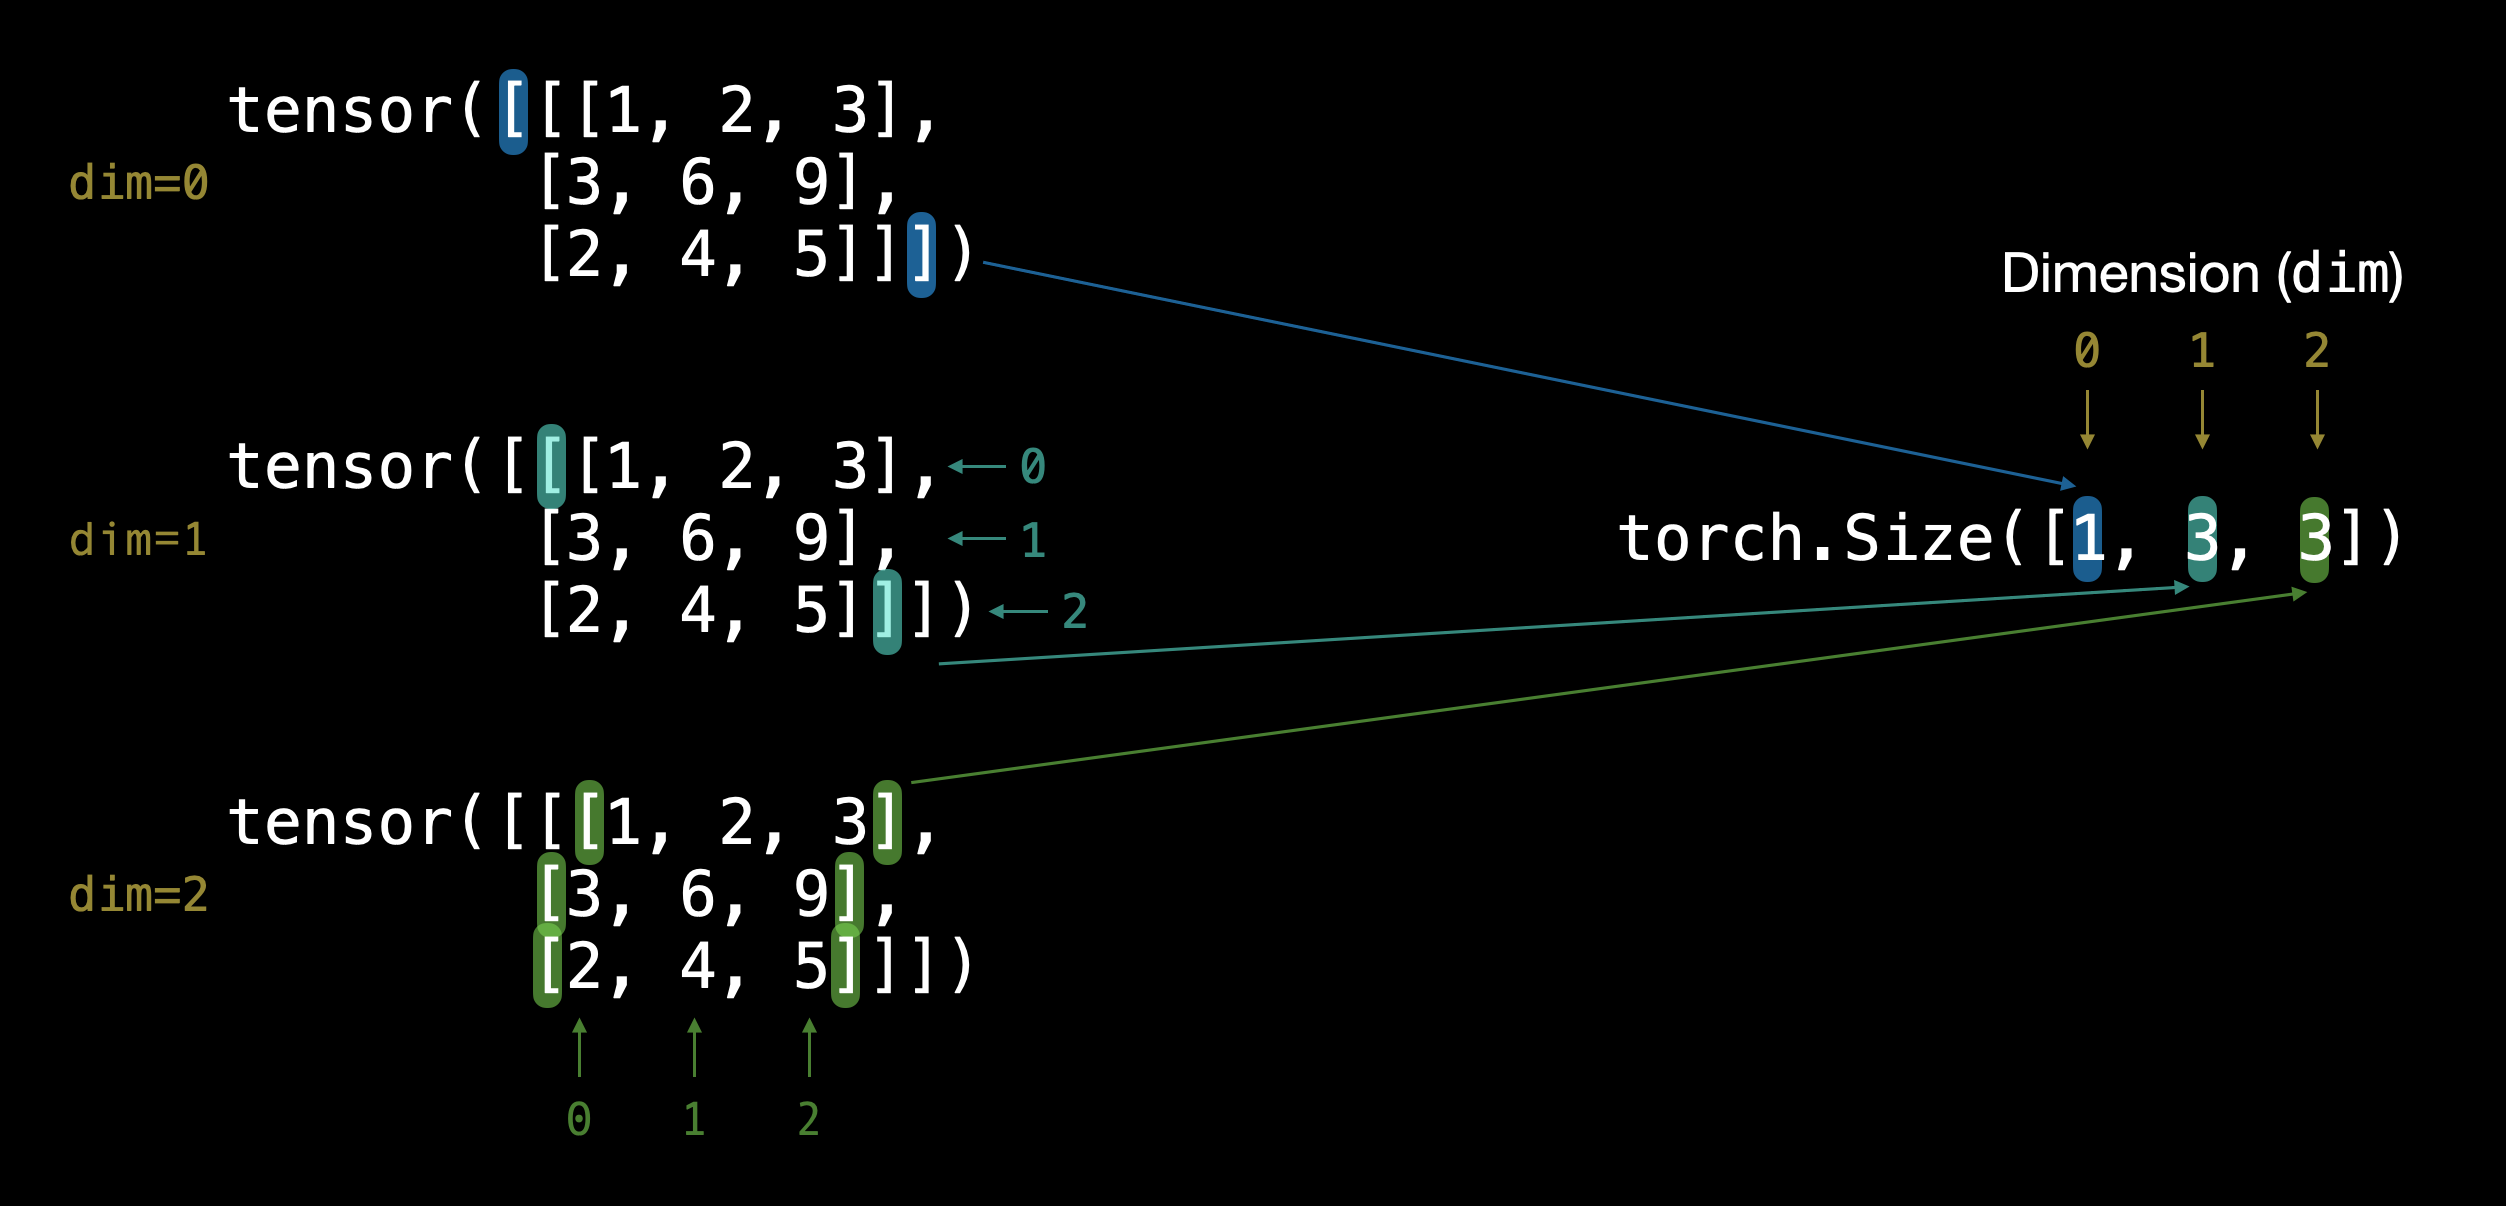

# Scaler, Vector, Matris ve Tensor Özet

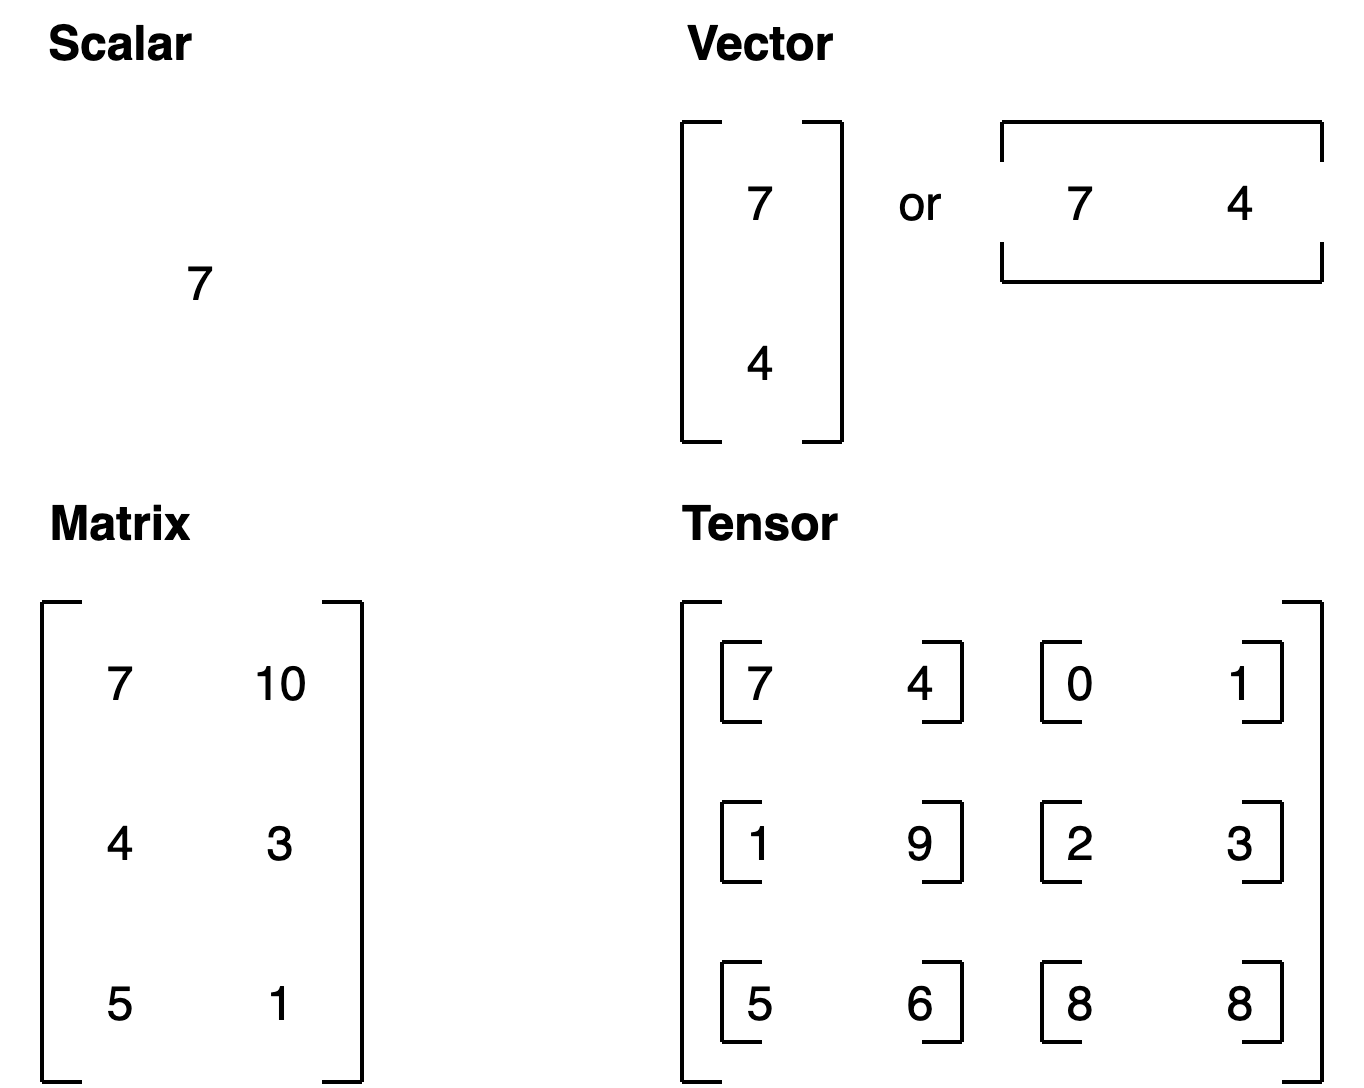

# Random Tensor

In [14]:
random_tensor = torch.rand(size=(3,4))
random_tensor, random_tensor.dtype

(tensor([[0.1409, 0.8442, 0.5004, 0.4536],
         [0.4279, 0.1710, 0.8531, 0.8710],
         [0.3715, 0.1145, 0.5683, 0.7630]]),
 torch.float32)

Öğrenme Döngüsü (The Loop):

- Start with random numbers: Model, tamamen saçma/rastgele tahminlerle işe başlar (Örneğin; drone'un önündeki ağacı "kuş" sanması gibi).

- Look at data: Gerçek veriyi görür.

- Update random numbers: Yaptığı hatayı fark eder ve o rastgele sayıları matematiksel olarak (Backpropagation ile) düzeltir.

- Repeat: Bunu milyonlarca kez tekrar eder.

In [15]:
random_image_torch_sensor = torch.rand(size=(224, 224, 3))
random_image_torch_sensor.ndim, random_image_torch_sensor.shape

(3, torch.Size([224, 224, 3]))

Bilgisayar için bu, pikselleri tamamen karıncalı (TV'deki karıncalı ekran gibi) olan ama boyut olarak gerçek bir resimle birebir aynı olan bir veridir. Modelini bununla test edebilirsin.

# Zeros and Ones

In [16]:
zeros = torch.zeros(size=(3,4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

İçi tamamen sıfırlarla dolu bir tensör oluşturuluyor.

Diyelim ki bir yapay zeka modeline farklı uzunlukta cümleler veriyorsun. Biri 3 kelime, diğeri 10 kelime. Bilgisayar matrisleri eşit boyutta ister. Kısa olan cümlenin sonuna, boşlukları doldurmak için "0" eklersin (Padding). Model "0" gördüğü yeri "işleme alma, burası boş" olarak algılar.


In [17]:
ones = torch.ones(size=(3,4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

İçi tamamen 1'lerle dolu bir yapı oluşturuluyor.

Genelde çarpma işlemlerinde "Etkisiz Eleman" olarak veya başlangıç ağırlıklarını (weights) belirli bir seviyede tutmak için kullanılır.

Ayrıca Transfer Learning (Transfer Öğrenme) yaparken, belirli katmanların etkisini "1" ile çarparak aktif tutmak için de kullanılabilir.

# torch.range()

In [18]:
zero_to_ten = torch.arange(start=0, end=10, step = 1)
zero_to_ten

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- Python'daki standart range() fonksiyonunun PyTorch versiyonudur. Veri biliminde zaman serileri oluştururken veya döngülerde çok sık kullanılır

- Fonksiyon: torch.arange(start, end, step)

- Parametrelerin Mühendislik Anlamı:
    - start=0: Başlangıç noktası (Dahil).
    - end=10: Bitiş noktası (HARİÇ!). Burası çok kritiktir. 0'dan 10'a kadar dediğinde, 10. sayıyı almaz, 9'da durur. Dizinin uzunluğu 10-0=10 eleman olur.
    - step=1: Adım aralığı. 1'er 1'er mi, 2'şer 2'şer mi gidecek? (Örn: 0, 2, 4...).

In [19]:
ten_zeros = torch.zeros_like(input=zero_to_ten)
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

- Diyelim ki AgriSpray Pro projesinde drone'dan gelen görüntülerin boyutu sürekli değişiyor (bazen 720p, bazen 1080p). Sen bu görüntülerle aynı boyutta bir "Sıfır Matrisi" (Maske) oluşturmak istiyorsun.

- Görüntünün boyutunu (shape) öğrenip, elle torch.zeros(size=(3, 1080, 1920)) yazmak. Bu, görüntü boyutu değişirse kodun patlamasına neden olur.

- torch.zeros_like(input=gelen_goruntu) kullanmak. Bu fonksiyon şunu yapar: "Bana verdiğin gelen_goruntu tensörünün şekline (shape) bak, aynısından bir tane oluştur ama içini sıfırlarla doldur.".

- Önceki adımda zero_to_ten adında 10 elemanlı bir vektör oluşturulmuştu. torch.zeros_like(zero_to_ten) kodu, yine 10 elemanlı bir vektör oluşturur ama içini 0 ile doldurur.


# Tensor DataType and Parameters

torch.tensor oluştururken şu 3 parametreye hükmedebilirsin:

- dtype: Veri tipi ne olsun? (torch.float16, torch.float32 vb.)

- device: Bu tensör nerede yaşasın?

   - "cpu": Bilgisayarın RAM'inde.

  - "cuda": NVIDIA ekran kartının VRAM'inde. (Senin GTX 1650 burada devreye giriyor).

- requires_grad: Türevi alınsın mı? (Model eğitirken True olur, sadece tahmin yaparken False yapılır).

In [20]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype = None,
                               device = None,
                               requires_grad = False)
float_32_tensor, float_32_tensor.dtype

(tensor([3., 6., 9.]), torch.float32)

- Varsayılan Kral: torch.float32:
Sen hiçbir şey belirtmezsen, PyTorch sayıları 32-bit Floating Point (Kayan Noktalı Sayı) olarak tutar. Bu, endüstri standardıdır. Hem yeterince hassastır hem de hızı makuldür.

    - Yüksek Hassasiyet (32-bit, 64-bit): Sayıyı 3.1415926535... gibi çok detaylı tutarsın. Sonuç doğru olur ama hafızan çabuk dolar ve işlemci çok ısınır.

    - Düşük Hassasiyet (16-bit): Sayıyı 3.14 gibi tutarsın. Hesaplama şimşek gibi hızlanır, pil ömrü uzar ama modelin doğruluğu (accuracy) biraz düşebilir.



In [21]:
float_16_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype = torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

Burada ise dtype = torch.float16 seçerek data tipini değiştirdik.

# Tensordan Bilgi Almak

In [22]:
some_tensor = torch.rand(size=(3,4))

print(some_tensor)
print(f"Shape of tensor is : {some_tensor.shape}")
print(f"Datatype of tensor is : {some_tensor.dtype}")
print(f"Device tensor is stored on {some_tensor.device}")

tensor([[0.4451, 0.0384, 0.2103, 0.5301],
        [0.2056, 0.2042, 0.6182, 0.2399],
        [0.9516, 0.1189, 0.3965, 0.9041]])
Shape of tensor is : torch.Size([3, 4])
Datatype of tensor is : torch.float32
Device tensor is stored on cpu


- What shape? (Şekli ne?): Beklediğim boyut bu mu?

- What datatype? (Veri tipi ne?): float32 beklerken int64 mı geldi?

- Where stored? (Nerede kayıtlı?): Tensörlerden biri CPU'da, diğeri GPU'da mı? (İkisi farklı odadaysa işlem yapamazlar!)

# Tensor Operasyonları

- Veri: Drone kamerandan gelen görüntü bir tensördür.

- Model: Henüz hiçbir şey bilmeyen bir matematiksel yapıdır.

- İşlem: Model, senin görüntünü alır; onu toplar, çıkarır, çarpar ve böler.

- Öğrenme: Bu işlemleri milyonlarca kez tekrar ederek (bir döngü içinde), hangi sayıları (ağırlıkları) kullanırsa "yabani otu" en iyi tespit edeceğini bulur.

### Temel Operasyonlar

- Addition (Toplama): Genelde "Bias" (Sapma) eklemek için kullanılır. ($y = mx + b$ denklemindeki $b$ gibi).

- Subtraction (Çıkarma): Hata oranını (Loss) hesaplarken kullanılır (Gerçek Değer - Tahmin Edilen Değer).

- Multiplication (Element-wise) (Eleman bazlı çarpma): İki resmin piksellerini birebir çarpmak veya filtrelemek için.

- Division (Bölme): Veriyi normalize etmek (0 ile 1 arasına sıkıştırmak) için.

- Matrix Multiplication (Matris Çarpımı): En Kritik Olanı! Yapay sinir ağlarının "kalbi" budur. İki büyük sayı tablosunun çarpılması işlemidir (Dot Product).

In [23]:
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

PyTorch burada "Broadcasting" (Yayınlama) denilen bir teknik kullanır.

Tensörün bir vektör ([1, 2, 3]), eklediğin sayı ise bir skaler (10) olmasına rağmen; PyTorch o 10 sayısını sanal olarak [10, 10, 10] haline getirir ve eleman bazlı (element-wise) toplar.

In [24]:
tensor * 10

tensor([10, 20, 30])

Aynı mantıkla her elemanı 10 ile çarpar.

Sonuç: [10, 20, 30].

In [25]:
torch.multiply(tensor, 10), torch.add(tensor, 10)

(tensor([10, 20, 30]), tensor([11, 12, 13]))

Bu da işlem yapmanın bir diğer yolu. Tabi bu işlemler değişkenler üzerinde yapılmıyor. '$=$' işareti kullanarak atama yapmamız gerekir.

Ya da aşağıdaki gibi bir eleman bazlı çarpma işlemi yapabiliriz. Bu matris çarpımı değildir sadece eleman bazlı bir çarpımdır.

In [26]:
print(f"Tensor 1 : {torch.tensor([1,2,3])} and Tensor 2 : {torch.tensor([10,20,30])}")
print(f"Çarpımları = {torch.tensor([1,2,3]) * torch.tensor([10,20,30])}")

Tensor 1 : tensor([1, 2, 3]) and Tensor 2 : tensor([10, 20, 30])
Çarpımları = tensor([10, 40, 90])


# Matris Çarpımı

In [27]:
tensor = torch.tensor([1,2,3])

Aşağıdaki işlem normal eleman bazlı çarpma işlemidir.

In [28]:
tensor * tensor

tensor([1, 4, 9])

Aşağıdaki işlem ise matmul() fonksiyonu kullanılarak yapılmış bir matris çarpım işleminin sonucudur. Sonucunda tek boyutlu bir skaler ortaya çıkmıştır.

In [29]:
torch.matmul(tensor, tensor)

tensor(14)

In [30]:
tensor @ tensor

tensor(14)

Ya da bu işlemi yapabilmek için araya  $@$  işareti koyularak yapılabilir.

Bu matris çarpımı işlemini elle manuel olarak da yapabiliriz ama bunun süresi daha uzun sürer

In [31]:
%%time

value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]

value

CPU times: user 441 µs, sys: 906 µs, total: 1.35 ms
Wall time: 1.6 ms


tensor(14)

In [32]:
%%time

torch.matmul(tensor, tensor)

CPU times: user 139 µs, sys: 22 µs, total: 161 µs
Wall time: 142 µs


tensor(14)

# Matris Çarpım Hataları

In [33]:
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype = torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11],
                         [9, 12]], dtype = torch.float32)

In [34]:
#torch.matmul(tensor_A, tensor_B)

Burada matris çarpımını yaptığımız zaman bir hata olduğunu anlamış olacağız. Boyutlar $(3 x 2)$'ye $(3 x 2)$ olduğu için hata alacağız. Birinin transpoze'unu alırsak bu sorunu çözmüş olacağız.

Önce normal tensorleri görelim.

In [35]:
print(tensor_A)
print(f"Tensor_A'nın boyutu : {tensor_A.size()}")
print("----------------------------")
print(tensor_B)
print(f"Tensor_B'nın boyutu : {tensor_B.size()}")


tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Tensor_A'nın boyutu : torch.Size([3, 2])
----------------------------
tensor([[ 7., 10.],
        [ 8., 11.],
        [ 9., 12.]])
Tensor_B'nın boyutu : torch.Size([3, 2])


Şimdi de aşağıda birinin transpozesinin alındığı hallerini görelim

In [36]:
print(tensor_A)
print(f"Tensor_A'nın boyutu : {tensor_A.shape}")
print("----------------------------------------------------")
print(tensor_B.T)
print(f"Tensor_B transpoze'nin boyutu : {tensor_B.T.shape}")

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Tensor_A'nın boyutu : torch.Size([3, 2])
----------------------------------------------------
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
Tensor_B transpoze'nin boyutu : torch.Size([2, 3])


Bu şekilde çarpım işlemi yapabiliriz

In [37]:
torch.matmul(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

matmul() yerine kısaca mm()'de yazılabilir.

In [38]:
torch.mm(tensor_A, tensor_B.T)

tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])

# Neural Networklerde Matris Çarpımı

$$y = x \cdot A^T + b$$
- $x$ (Input): Girdi verisi (Senin tensor_A dediğin veri).
- $A$ (Weights): Ağırlık matrisi. Yapay zekanın öğrenmeye çalıştığı asıl bilgiler burada saklıdır.
- $A^T$ (Transpose): Dikkat! Formülde $T$ harfi var. PyTorch, arka planda ağırlık matrisini transpoz ederek (çevirerek) çarpar. Az önce senin elle yaptığın .T işlemini bu katman otomatik yapar.
- $b$ (Bias): Sapma değeri.
- $y$ (Output): Çıktı verisi.

Özetle: torch.nn.Linear() dediğin şey, aslında süslü bir Matris Çarpımı + Toplama işlemidir.

In [39]:
torch.manual_seed(42)
# nn.Linear katmanı ilk oluşturulduğunda içi boş değildir; öğrenmeye başlayabilmesi için rastgele ağırlık sayılarıyla (Weights) doldurulur.

linear = torch.nn.Linear( # Burada modelin Mimarisini (Architecture) tanımlıyorsun. Henüz hiçbir işlem yapılmıyor, sadece "kurallar" belirleniyor.
    in_features=2,
    # Burası senin Giriş Kapın. Önceki adımlardan hatırlarsan tensor_A'nın şekli (3, 2) idi. Yani her bir veri örneğinin 2 adet özelliği (sütunu) vardı.
    # Bu parametre, gelen verinin sütun sayısıyla eşleşmek zorundadır. Yoksa "Shape Mismatch" hatası alırsın.

    out_features=6
    # Burası senin Çıkış Kapın. "Benim yapay zeka modelim, bu 2 bilgiyi alsın ve onları analiz ederek 6 farklı bilgiye dönüştürsün" diyorsun.
    # Bu sayıyı sen belirlersin. İstersen 100 yap, istersen 1 yap. Bu, katmanın "genişliğini" belirler.
)

x = tensor_A

output = linear(x)
# İşte az önce öğrendiğimiz Matris Çarpımı formülü (y = x.A^T + b) tam olarak bu satırda, arka planda çalışır.
# PyTorch burada şunları yapar:Girdi Kontrolü: x tensörünün son boyutu (2), benim in_features değerimle (2) uyuşuyor mu? (Evet).
# Ağırlık Matrisi: Kendi içinde rastgele oluşturduğu (6, 2) boyutundaki ağırlık matrisini (A) alır.Transpose: Formül gereği bu matrisi çevirir (.T işlemi) -> (2, 6) olur.
#Çarpma: (3, 2) boyutundaki x ile (2, 6) boyutundaki ağırlıkları çarpar.(3, 2) @ (2, 6) -> (3, 6)Bias Ekleme: Sonuca sapma değerlerini ekler.

print(f"Input {x} and shape of input {x.shape}\n")
print(f"Output {output} and shape of output {output.shape}")


Input tensor([[1., 2.],
        [3., 4.],
        [5., 6.]]) and shape of input torch.Size([3, 2])

Output tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>) and shape of output torch.Size([3, 6])


Nevada Coffee Projenden Örnek Verelim: Diyelim ki girişteki 2 özellik (in_features=2) şunlar:

- Kahve Çekirdeği Miktarı (Gr)

- Su Sıcaklığı (°C)

Sen modele diyorsun ki: "Bu 2 veriyi al, bunları çarp/böl/topla ve bana kahvenin kalitesini etkileyen 6 farklı ara özellik çıkar (out_features=6)."

Model eğitimi bittiğinde, o 6 sütun (sen ismini koymasan bile) matematiksel olarak şunları temsil etmeye başlayabilir:

- Sütun 1: Kafein Yoğunluğu (Kahve miktarıyla ilişkili)

- Sütun 2: Asidite Oranı (Sıcaklıkla ilişkili)

- Sütun 3: Yanıklık Tadı

- Sütun 4: Maliyet

- Sütun 5: Aroma

- Sütun 6: Kıvam

Özetle: Sen modele "Bana bu olayı çözmek için 6 tane bakış açısı (feature) üret" dedin. O da 2 veriden 6 farklı çıkarım yapmaya çalışıyor.

# Tensorlarda Aggregation

In [40]:
x = torch.arange(start = 0, end = 100, step = 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

Öncelikle burada bir adet tensor oluşturduk. Şimdi de bundaki min, max, mean gibi değerleri elde edeceğiz.

In [41]:
print(f"Minimum : {x.min()}")
print(f"Maksimum : {x.max()}")
print(f"Ortalama : {x.type(torch.float32).mean()}")
print(f"Toplamları : {x.sum()}")

Minimum : 0
Maksimum : 90
Ortalama : 45.0
Toplamları : 450


torch.mean() fonksiyonu işlem yapabilmek için verinin Float (Virgüllü Sayı) olmasını zorunlu kılar. Tamsayıların ortalamasını (int64) hesaplamayı reddeder.

Çözüm olarak ise kodda .type(torch.float32) eklenerek veri önce tamsayıdan ondalıklı sayıya dönüştürülmüş, sonra ortalaması alınmıştır.

In [42]:
x.max(), torch.max(x)

(tensor(90), tensor(90))

Bu iki syntax'da aynı sonucu verecektir.

#Positional min/max

Yukarıda tanılmadığımız x tensöründeki maksimum ve minimum sayının bize tensor içerisindeki indexlerini dönen metotlar aşağıdaki gibidir.

In [43]:
print(x)
print(f"Maksimum sayının indexi : {torch.argmax(x)}")
print(f"Minimum sayının indexi : {torch.argmin(x)}")

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])
Maksimum sayının indexi : 9
Minimum sayının indexi : 0


#Change Tensor Datatype

In [44]:
tensor = torch.arange(10., 100., 10.)
tensor.dtype

torch.float32

PyTorch'ta bir tensör oluşturduğunda varsayılan tipi float32'dir. Ancak bazen bunu değiştirmek istersin.

In [45]:
tensor_float16 = tensor.type(torch.float16)
tensor_float16

tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)

In [46]:
tensor_int8 = tensor.type(torch.int8)
tensor_int8

tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

Veri tipi değiştirmek sadece "keyfi" bir işlem değildir; Optimizasyonun temelidir.

Örneğin;

- Eğitirken: float32 (Hassas olsun).

- Çalıştırırken (Deploy): float16 veya int8 (Hızlı olsun).

#Reshaping, stacking, squeezing and unsqueezing

Buradaki fonksiyonlar, tensörün içindeki sayıları (veriyi) değiştirmeden, onların diziliş şeklini değiştirir

### torch.reshape(input, shape) ve Tensor.view(shape)


- Bu ikisi kardeştir ama aralarında bellek (RAM) farkı vardır.

- Ne Yapar? Örneğin (2, 3)'lük bir matrisi (1, 6)'lık bir vektöre çevirir. 6 eleman hala oradadır, sadece duruşları değişir.

  - view: Bellekte yeni bir yer açmaz. Orijinal tensörle aynı hafıza adresini paylaşır. Çok hızlıdır ve VRAM dostudur.

  - reshape: Bazen veriyi kopyalayıp yeni bir yere yazabilir (eğer hafıza dağınık duruyorsa). Daha esnektir ama bazen daha maliyetlidir.

In [47]:
import torch
x = torch.arange(start = 1., end=8.0)
x, x.shape, x.ndim

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.Size([7]), 1)

In [48]:
#reshape ile
x_reshaped = x.reshape(1,7)
x_reshaped, x_reshaped.shape, x_reshaped.ndim

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]), 2)

In [49]:
# view ile
z = x.view(1,7)
z, z.shape, z.ndim

(tensor([[1., 2., 3., 4., 5., 6., 7.]]), torch.Size([1, 7]), 2)

view ile işlem yapınca orijinal tensorde olan değer de değişiyor

In [50]:
z[:,0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7.]]), tensor([5., 2., 3., 4., 5., 6., 7.]))

###torch.stack(tensors, dim=0)

Elindeki ayrı ayrı tensörleri, yeni bir boyut ekleyerek üst üste yığar.

In [51]:
x_stacked = torch.stack(tensors=[x,x,x,x], dim = 0)
x_stacked, x_stacked.shape, x_stacked.ndim

(tensor([[5., 2., 3., 4., 5., 6., 7.],
         [5., 2., 3., 4., 5., 6., 7.],
         [5., 2., 3., 4., 5., 6., 7.],
         [5., 2., 3., 4., 5., 6., 7.]]),
 torch.Size([4, 7]),
 2)

###torch.squeeze(input) ve torch.unsqueeze(input, dim)

Derin öğrenmede modeller genelde tek bir örnekle çalışmaz, paketlerle (batch) çalışır. Bu fonksiyonlar o "paket boyutunu" ekleyip çıkarmaya yarar.

`unsqueeze (Genişlet):` 1 boyutlu bir eksen ekler.
- Sorun: Drone kamerandan tek bir resim geldi: (3, 224, 224).

- Model Beklentisi: (Batch_Size, 3, 224, 224).

- Hata: Model "Ben 4 boyutlu veri bekliyorum, sen 3 boyutlu verdin" der.

Çözüm: image.unsqueeze(dim=0) -> Sonuç: (1, 3, 224, 224). (Artık 1 elemanlı bir paket oldu, model bunu kabul eder).


`squeeze (Sıkıştır):` Gereksiz olan 1 boyutlarını siler.

- Durum: Modelden çıktı aldın: (1, 10). (1 paket, 10 sınıf).

- İşlem: cikti.squeeze() -> Sonuç: (10). (Düz vektöre döndü, işlemesi daha kolay).

In [52]:
print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# remove exstra dimensions
x_squeezed = x_reshaped.squeeze() # torch.squeeze() ile de yapılabilir.
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])


Az önce paketten çıkardığımız tensörü tekrar paketliyoruz.

In [53]:
print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

x_unsqueezed = torch.unsqueeze(x_squeezed,dim = 0)

print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")


Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


dim = 0 yazmak
  - Satır Vektörü. Genelde veriyi "Paketlemek" (Batching) için kullanılır.

dim = 1 yazmak
  - Sütun Vektörü. Veriyi "Dikine" çevirip matris çarpımına hazırlamak için kullanılır.

###torch.permute(input, dims)

Ne Yapar? Boyutların sırasını değiştirir (Takla attırır).

Senaryo:

- Normal bir resim dosyası genelde şöyledir: (Yükseklik, Genişlik, Renk) -> (224, 224, 3).

- PyTorch ise resimleri şöyle ister: (Renk, Yükseklik, Genişlik) -> (3, 224, 224).

Çözüm: image.permute(2, 0, 1) komutuyla renk kanalını (2. indeks) en başa alırsın.

In [54]:
x_original = torch.rand(size=(224,224,3))

x_permuted = x_original.permute(2,0,1)

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


Permute işlemi hafızada veriyi kopyalamaz, sadece bir "View" (Bakış Açısı) oluşturur.

Risk: Eğer x_permuted üzerinde bir pikseli değiştirirsen, orijinal x_original verisi de bozulur.

# Indexing

"Kocaman bir veri ambarından cımbızla tek bir sayıyı çekip çıkarmak" olarak düşünebilirsin.

In [55]:
x = torch.arange(start = 1, end = 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]),
 torch.Size([1, 3, 3]))

In [56]:
print(f"First square bracket:\n{x[0]}")
print(f"Second square bracket: {x[0][0]}")
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


Tensörümüz x, (1, 3, 3) boyutunda.

- Dim 0: Batch (Koli)

- Dim 1: Satır (Yükseklik)

- Dim 2: Sütun (Genişlik)

In [57]:
x[:, 0]

tensor([[1, 2, 3]])

`:` == "Tüm Batch'leri (kolileri) gez."

`, 0` ==  "Ama her kolinin sadece 0. Satırını al."

In [58]:
x[:,:,1]

tensor([[2, 5, 8]])

`:` == "Tüm Batch'leri al."

`:` == "Tüm Satırları al."

`, 1` == "Ama sadece 1. Sütunu (ortadaki dikey şeridi) getir."

In [59]:
x[:,1,1]

tensor([5])

`:` == "Tüm Batch'leri al."

`, 1` == "1. Satıra git."

`, 1` == "1. Sütuna git."

In [60]:
x[0,0,:]

tensor([1, 2, 3])

`0` == "Sadece 0. Batch'i (ilk koliyi) al."

`0` ==  "Sadece 0. Satırı al."

`:` == "Oradaki TÜM sütunları (sayıları) getir."

Mühendislik Özeti: "Visualize, Visualize, Visualize"

- Virgül (,): Boyutlar arasında geçiş yapar (Kapıdan geçmek gibi).

- İki Nokta (:): O boyutun tamamını kapsar (Hepsini seçmek gibi)

# PyTorch Tensors & NumPy

Python ekosistemindeki kütüphanelerin %99'u (OpenCV, Pandas, Scikit-Learn, Matplotlib) veriyi NumPy Array olarak üretir. Ancak senin PyTorch modelin Tensör ister. İşte alttaki fonksiyonlar, o çeviriyi yapan "Universal Adaptör"lerdir.

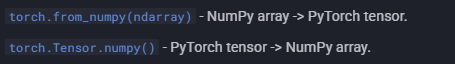

### torch.from_numpy()

In [61]:
import torch
import numpy as np

array = np.arange(1., 8.)
tensor = torch.from_numpy(array)
array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

Burada çok kritik bir Mühendislik Çatışması var:

`NumPy'ın Varsayılanı:` Hassasiyete önem verir, sayıları Double Precision (float64) olarak tutar.

`PyTorch'un Varsayılanı:` Hıza (GPU) önem verir, sayıları Single Precision (float32) olarak tutar.

`Sorun:` Sen torch.from_numpy() dediğinde, PyTorch veriyi olduğu gibi (64-bit) alır. Eğer bu tensörü, varsayılan olarak float32 bekleyen bir Sinir Ağına (Neural Network) sokarsan, "RuntimeError: Expected object of scalar type Float but got scalar type Double" hatası alırsın.

`Çözüm:` NumPy'dan veri aldığında genelde hemen peşine .type(torch.float32) eklemeyi alışkanlık haline getirmelisin.

In [62]:
tensor = torch.from_numpy(array).type(torch.float32)
tensor, tensor.dtype

(tensor([1., 2., 3., 4., 5., 6., 7.]), torch.float32)

Bu şekilde numpy array kullanarak tensor oluşturduktan sonra array içindeki değerleri değiştirsek bile tensor aynı kalır, korunur.

In [63]:
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

###tensor.numpy()

In [64]:
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

Buradaki numpy arrayi tensor kullanarak oluşturduğumuz için datatype = float32 olacaktır.

In [65]:
tensor = tensor + 1
tensor, numpy_tensor

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

Burada da aynı koruma kuralı geçerlidir.

# Random Tensor Üretme

Bilgisayar Rastgele Sayı Üretemez. Bilgisayar, çok karmaşık bir matematiksel formül (Algoritma) kullanır. Bu formüle bir başlangıç sayısı (Seed/Tohum) verirsin, o da sana rastgele gibi görünen ama aslında tamamen hesaplanmış bir sayı dizisi üretir.

In [66]:
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}")
print(f"Tensor B: \n{random_tensor_B}")

print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

Tensor A:
tensor([[0.8016, 0.3649, 0.6286, 0.9663],
        [0.7687, 0.4566, 0.5745, 0.9200],
        [0.3230, 0.8613, 0.0919, 0.3102]])
Tensor B: 
tensor([[0.9536, 0.6002, 0.0351, 0.6826],
        [0.3743, 0.5220, 0.1336, 0.9666],
        [0.9754, 0.8474, 0.8988, 0.1105]])
Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

Sonuç tamamen False (Yanlış) dolu bir matris. Yani tek bir hücre bile şans eseri aynı gelmemiş.

Sen bilgisayara "bir tohum (seed) belirle" demedin. Bu durumda bilgisayar (genellikle) Sistem Saatini (System Clock) tohum olarak kullanır.

1. Satır Çalışırken: Saat 14:00:00.001. Tohum bu sayı oldu -> Çıktı Tensor A.

2. Satır Çalışırken: Saat 14:00:00.002 (milisaniye geçti). Tohum değişti -> Çıktı Tensor B.

In [67]:
RANDOM_SEED = 42
torch.manual_seed(seed = RANDOM_SEED)
random_tensor_C = torch.rand(3,4)

# Have to reset the seed every time a new rand() is called
# Without this, tensor_D would be different to tensor_C

torch.manual_seed(seed=RANDOM_SEED)
random_tensor_D = torch.rand(3,4)

In [68]:
print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

Tensor C ve Tensor D'nin değerlerine bakarsan (0.8823...), virgülden sonraki 4. haneye kadar birebir aynı olduklarını ve == testinden True (Doğru) ile geçtiklerini görürsün.

# Running Tensors on GPU

Yapay zeka modelleri CPU'da çalışırsa kağnı, GPU'da çalışırsa yarış arabası olur. CPU (Merkezi İşlem Birimi): Bilgisayarındaki Intel/AMD işlemci. Az sayıda (örneğin 6-12) ama çok güçlü çekirdeği vardır.
- PyTorch tensörleri aksi belirtilmedikçe burada yaşar.

Yapay sinir ağları, milyarlarca basit çarpma işleminden (Matris Çarpımı) ibarettir. Bu yüzden GPU'lar bu iş için biçilmiş kaftandır.

`CUDA`(Compute Unified Device Architecture), NVIDIA'nın geliştirdiği bir yazılım köprüsüdür. Normalde GPU sadece ekrana piksel basmayı bilir. CUDA sayesinde sen, Python (PyTorch) kodunu GPU'nun anlayacağı dile çevirip, ekran kartını bir Matematik İşlemcisi gibi kullanabilirsin.

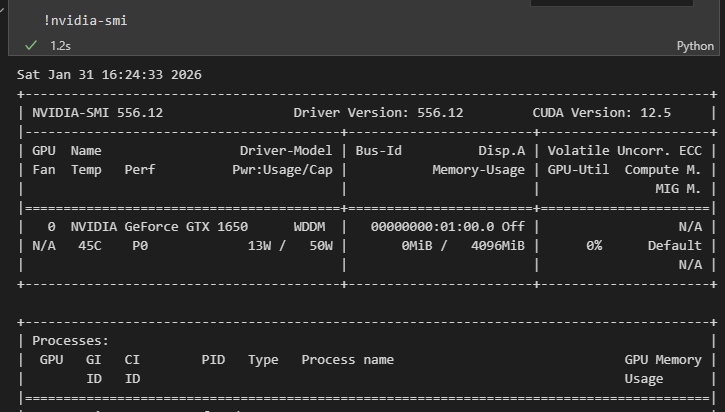

In [69]:
torch.cuda.is_available()

True

In [70]:
!nvidia-smi

Mon Feb  2 10:04:03 2026       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   63C    P8             11W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

Tabi bunu Google Colab'de çalıştırabilmek için runtime = gpu olması gerekiyor.

In [71]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Sistemde PyTorch'un kullanabileceği 1 adet GPU var. Bunu da aşağıdakini yazarak görebiliyoruz.

In [72]:
torch.cuda.device_count()

1

# Apple Silicon

Apple bilgisayarlarda CUDA çalışmaz işte o zaman MPS devreye girer.

In [73]:
# Check for Apple Silicon GPU
import torch
torch.backends.mps.is_available() # Note this will print false if you're not running on a Mac

False

In [74]:
# Set device type
if torch.cuda.is_available():
  device = "cuda"
elif torch.backends.mps.is_available():
  device = "mps"
else:
  device = "cpu"

Bu şekilde olan cihaz türünü direkt olarak ayarlayabiliriz.

In [75]:
device

'cuda'

# GPU'da Çalıştırma

In [76]:
tensor = torch.tensor([1,2,3])
print(tensor, tensor.device)
print("------------------------------------------")
tensor_on_gpu = tensor.to(device)
print(tensor_on_gpu, tensor_on_gpu.device)

tensor([1, 2, 3]) cpu
------------------------------------------
tensor([1, 2, 3], device='cuda:0') cuda:0


Bu yukarıda yapmış olduğumuz device belirleme işlemi sayesinde oldu tabi ki.

Yani tamamıyla aşağıdaki kod bloğu gibidir çalışma şekli :

In [83]:
import torch

# 1. Cihaz Belirle
device = "cuda" if torch.cuda.is_available() else "cpu"

# 2. Varsayılan olarak CPU'da tensor oluştur
tensor = torch.tensor([1,2,3])
print(f"Tensorü oluşturduk ve doğduğu yer : {tensor.device}")

# 3. Tensörü GPU'ya taşı
tensor = tensor.to(device)
print(f"Tensörün şu an bulunduğu yer : {tensor.device}")

Tensorü oluşturduk ve doğduğu yer : cpu
Tensörün şu an bulunduğu yer : cuda:0


# Çalışma şeklini GPU'dan CPU'ya alma

In [79]:
#tensor_on_gpu.numpy()

Üstteki bu kod bloğu hata verir. NumPy kütüphanesi (Python'un matematik atası), sadece ve sadece CPU belleği (RAM) ile çalışmak üzere tasarlanmıştır. Ona "Git şu ekran kartının belleğindeki (VRAM) veriyi al" dersen, "Ben oraya gidemem, yetkim yok" der ve çöker.

Veriyi NumPy ile kullanabilmek için önce onu CPU'ya geri kopyalaman gerekir.

In [80]:
# hatalı olan alttaki ifade
# tensor_back_on_cpu = tensor_on_gpu.numpy()

tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

In [82]:
print(f"GPU'da bulunan tensor : {tensor_on_gpu} ve onun adresi {tensor_on_gpu.device}")
print(f"CPU'da bulunan tensor : {tensor_back_on_cpu} ve onun adresi {tensor_back_on_cpu.device}")

GPU'da bulunan tensor : tensor([1, 2, 3], device='cuda:0') ve onun adresi cuda:0
CPU'da bulunan tensor : [1 2 3] ve onun adresi cpu
